In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#35 min

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('/content/smartphones-cleaned.csv')

In [4]:
df.head()

,brand_name,model,price,ratings,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_capacity,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cameras,primary_rear_camera,num_front_cameras,primary_front_camera,extended_memory_available,extended_upto,os_type
0,oppo,OPPO Find N2 Flip,89999,88,True,True,False,Dimensity 9000 Plus,dimensity,8.0,3.2,8.0,256.0,4300.0,44.0,1,6.80,1080 x 2520,120,2,50.0,1,32.0,0,NaN,NaN
1,vivo,Vivo V27,32999,85,True,False,False,Dimensity 7200,dimensity,8.0,2.8,8.0,128.0,4600.0,66.0,1,6.78,1080 x 2400,120,3,50.0,1,50.0,0,NaN,android
2,oneplus,OnePlus 11R,39999,85,True,True,True,Snapdragon 8+ Gen1,snapdragon,8.0,3.2,8.0,128.0,5000.0,100.0,1,6.74,1240 x 2772,120,3,50.0,1,16.0,0,NaN,android
3,motorola,Motorola Moto G73,18999,84,True,True,False,Dimensity 930,dimensity,8.0,2.2,8.0,128.0,5000.0,30.0,1,6.50,1080 x 2400,120,2,50.0,1,16.0,1,1024.0,android
4,vivo,Vivo V27 Pro,37999,84,True,False,False,Dimensity 8200,dimensity,8.0,3.1,8.0,128.0,4600.0,66.0,1,6.78,1080 x 2400,120,3,50.0,1,50.0,0,NaN,android


In [5]:
df.shape

(779, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 779 non-null    object 
 1   model                      779 non-null    object 
 2   price                      779 non-null    int64  
 3   ratings                    779 non-null    int64  
 4   has_5g                     779 non-null    bool   
 5   has_nfc                    779 non-null    bool   
 6   has_ir_blaster             779 non-null    bool   
 7   processor_name             752 non-null    object 
 8   processor_brand            752 non-null    object 
 9   num_cores                  769 non-null    float64
 10  processor_speed            769 non-null    float64
 11  ram_capacity               776 non-null    float64
 12  internal_memory            776 non-null    float64
 13  battery_capacity           769 non-null    float64

# Reason for EDA:

1. Analysis
2. ML model: price predictor -> how price col is releated to other cols ✔
3. missing values: how to fill those




In [7]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
ratings                        0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_name                27
processor_brand               27
num_cores                     10
processor_speed               10
ram_capacity                   3
internal_memory                3
battery_capacity              10
fast_charging_capacity       224
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cameras               0
primary_rear_camera            0
num_front_cameras              0
primary_front_camera           1
extended_memory_available      0
extended_upto                274
os_type                        8
dtype: int64

# steps for eda

1. Dividing cols based on type
2. univariate analysis
3. bivariate analysis
4. multivariate analysis
5. feature engneering
6. fill missing data
7. detect outliers: keep or remove them 
8. change data fromate suitable for ml model

In [8]:
df.sample()

,brand_name,model,price,ratings,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_capacity,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cameras,primary_rear_camera,num_front_cameras,primary_front_camera,extended_memory_available,extended_upto,os_type
77,samsung,Samsung Galaxy M53 5G (8GB RAM + 128GB),25490,87,True,False,False,Dimensity 900 5G,dimensity,8.0,2.4,8.0,128.0,5000.0,25.0,1,6.7,1080 x 2400,120,4,108.0,1,32.0,1,1024.0,android


# column types

- with column description

1. numerical
  - `price`: price of a smartphone [in Ruppes]
  - `ratings`: rating of a smartphone [out of 100]
  - `processor_speed`: speed of processor [in GHz]
  - `battery_capacity`: total battery capacity [in maH]
  - `fast_charging_capacity`: total capacity of fast charging [in watt]
  - `screen_size`: size of smartphone display [in inches] 
  - `primary_rear_camera`: primary rear camera [in MP]	
  - `primary_front_camera`: primary front camera [in MP]

  
2. categorical
  - `brand_name`: brand of a smartphone
  - `has_5g`: does a smartphone include 5g [true/false]
  - `has_nfc`: does a smartphone include nfc [true/false]
  - `has_ir_blaster`: does a smartphone include IR Blaster [true/false]
  - `processor_brand`: brand of a processor
  - `num_cores`: number of processor cores present [8,6,4,2]
  - `fast_charging_available`: does a smartphone includes option of fast charging [0(false)/1(true)]
 - `ram_capacity`: amount of ram available [in GB]
  - `num_rear_cameras`: total number of rear cameras
  - `num_front_cameras`	total number of front cameras
  - `extended_memory_available`: is there an option to extend memory [0(false)/1(true)]
  - `os_type`: type of opreating system [andriod, ios]
  - `internal_memory`: amount of internal mermoy available [internal_memory]
  - `refresh_rate`: refresh rate of smartphone [in Hz]
  - `extended_upto`: limit til memory can be extended [in GB]

3. mixed
  - `model`: model of smartphone
  - `processor_name`: name of processor
  - `resolution`: height and width of resoultion [in px]

# univariate analysis on Categorical column

## brand_name

- categorical column

**conclusions**

- top 10 brands


In [9]:
#1. frequency distribution
df['brand_name'].value_counts()

realme        114
xiaomi        112
samsung       110
vivo           76
oppo           51
apple          43
poco           42
motorola       38
tecno          32
infinix        30
iqoo           22
nokia          21
oneplus        20
ikall          17
lava           12
itel            9
micromax        9
google          5
asus            4
nothing         3
sony            2
jio             1
benco           1
elephone        1
lyf             1
blackberry      1
telefono        1
gionee          1
Name: brand_name, dtype: int64

<Axes: >

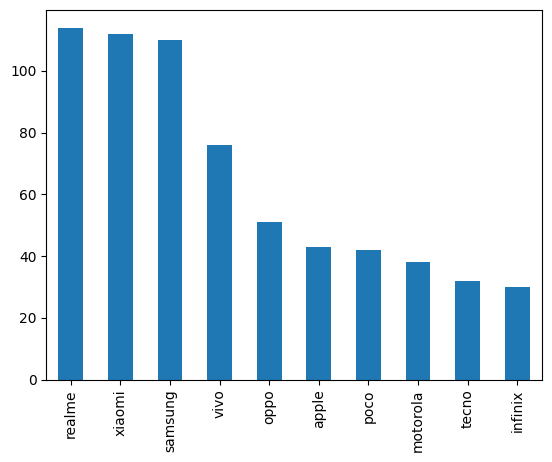

In [10]:
#2. graph of top ten brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='brand_name'>

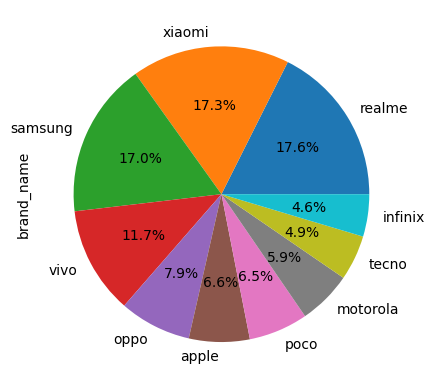

In [11]:
#2. precentage of phones available of each barnd in market
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [12]:
#3.missing values
df['brand_name'].isnull().sum()

0

## has_5g                     
- categorical

**conclusions**

- assumption: price of phones who has 5g will be higher than the phones without it

In [13]:
df['has_5g'].value_counts()

False    459
True     320
Name: has_5g, dtype: int64

<Axes: ylabel='has_5g'>

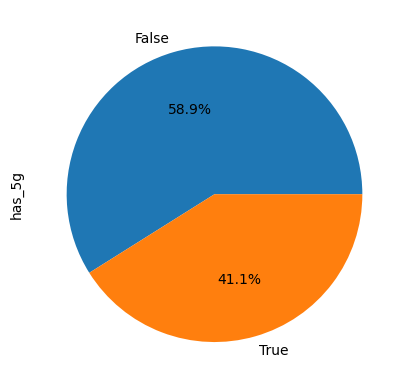

In [14]:
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: >

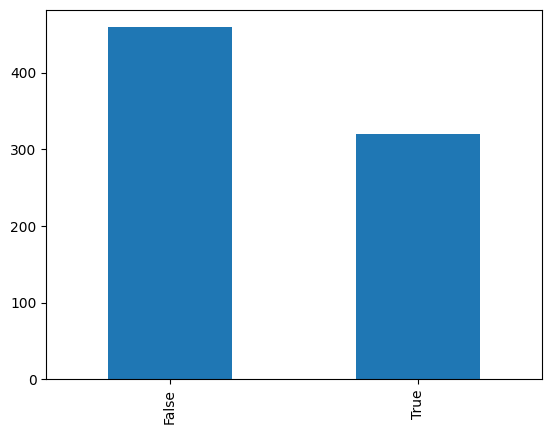

In [15]:
df['has_5g'].value_counts().plot(kind='bar')

## has_nfc

- categorical

**conclusions**



In [16]:
df['has_nfc'].value_counts()

False    573
True     206
Name: has_nfc, dtype: int64

<Axes: >

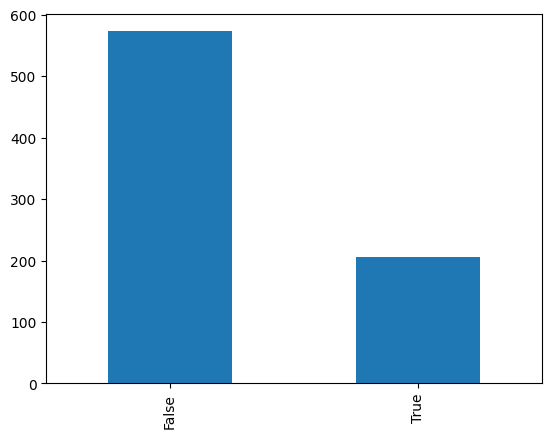

In [17]:
df['has_nfc'].value_counts().plot(kind='bar')

<Axes: ylabel='has_nfc'>

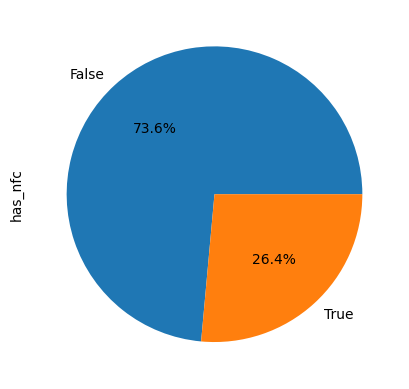

In [18]:
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## has_ir_blaster

- categorical

**conclusion**


In [19]:
df['has_ir_blaster'].value_counts()

False    656
True     123
Name: has_ir_blaster, dtype: int64

<Axes: >

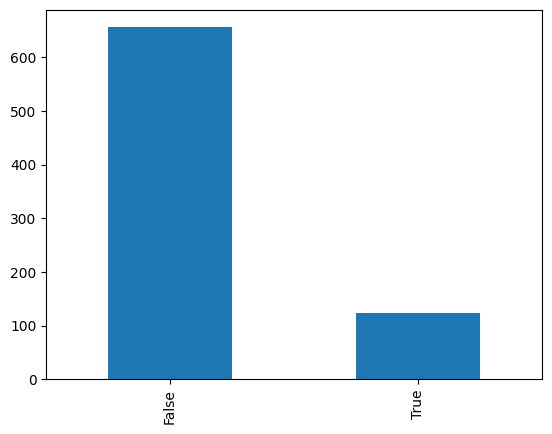

In [20]:
df['has_ir_blaster'].value_counts().plot(kind='bar')

<Axes: ylabel='has_ir_blaster'>

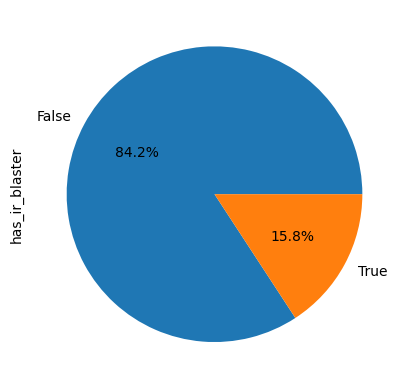

In [21]:
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [22]:
#which phones provide this feature
df[df['has_ir_blaster']==True]['brand_name'].value_counts()

#mostly chinese phones provide this feature

xiaomi     84
poco       31
iqoo        6
oneplus     2
Name: brand_name, dtype: int64

## processor_brand               

In [23]:
df['processor_brand'].value_counts()

snapdragon    259
helio         223
dimensity     117
bionic         43
unisoc         37
exynos         35
tiger          21
qualcomm        7
tensor          4
spreadtrum      4
sc9863a         2
Name: processor_brand, dtype: int64

<Axes: >

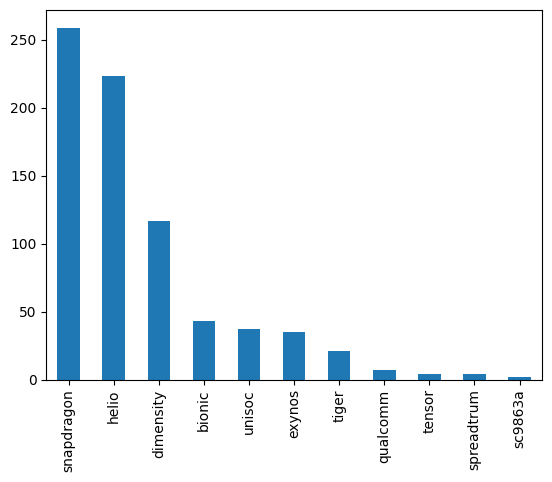

In [24]:
df['processor_brand'].value_counts().plot(kind='bar')

<Axes: ylabel='processor_brand'>

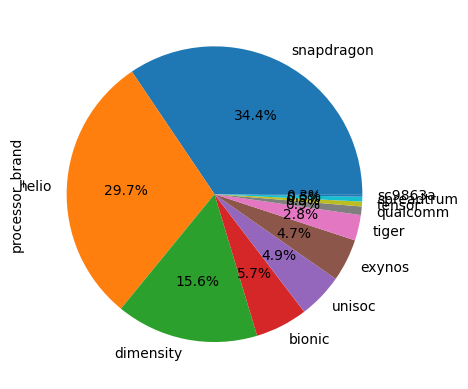

In [25]:
df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## num_cores

**conclusions**

- most phone has same value(octa core) -> won't contribute that much in analysis

<Axes: ylabel='num_cores'>

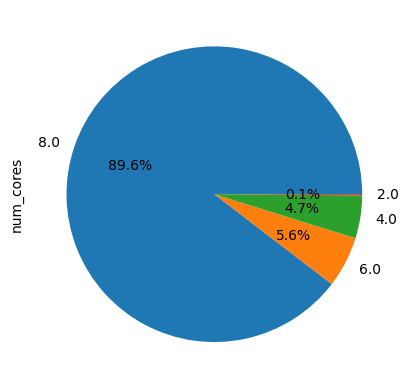

In [26]:
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
df['num_cores'].value_counts()

8.0    689
6.0     43
4.0     36
2.0      1
Name: num_cores, dtype: int64

<Axes: >

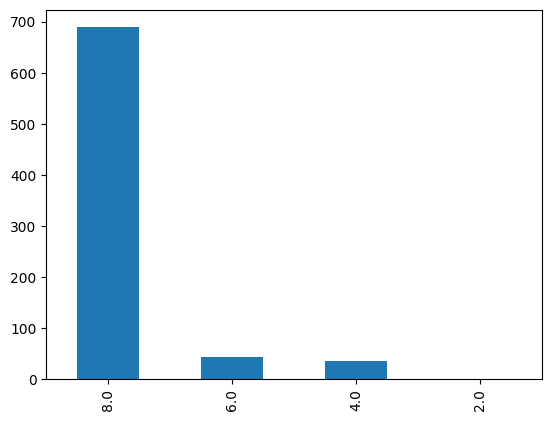

In [28]:
df['num_cores'].value_counts().plot(kind='bar')

## fast_charging_available

<Axes: ylabel='fast_charging_available'>

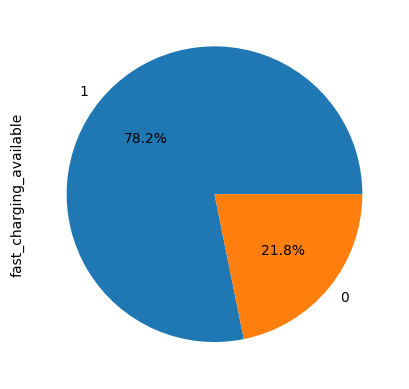

In [29]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [30]:
df['fast_charging_available'].value_counts()

1    609
0    170
Name: fast_charging_available, dtype: int64

<Axes: >

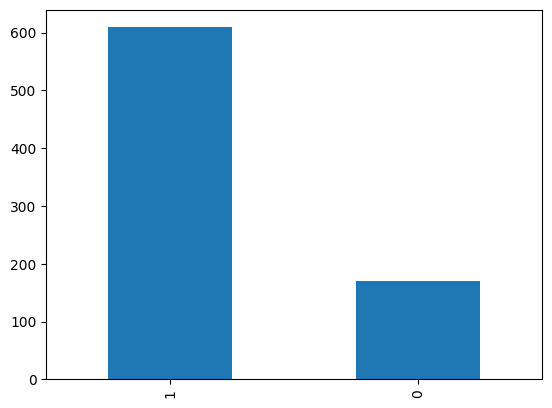

In [31]:
df['fast_charging_available'].value_counts().plot(kind='bar')

## ram_capacity

<Axes: ylabel='ram_capacity'>

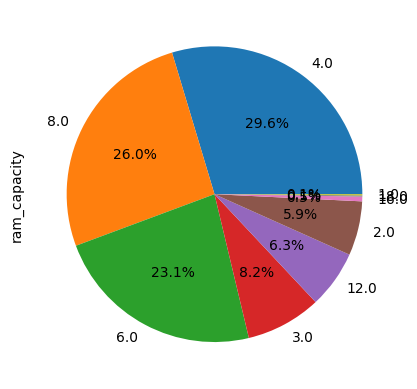

In [32]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [33]:
df['ram_capacity'].value_counts()

4.0     230
8.0     202
6.0     179
3.0      64
12.0     49
2.0      46
16.0      4
18.0      1
1.0       1
Name: ram_capacity, dtype: int64

## internal_memory

<Axes: ylabel='internal_memory'>

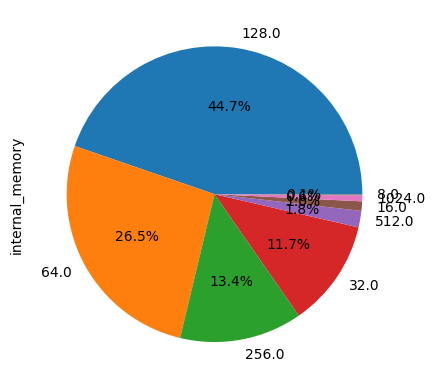

In [34]:
df['internal_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [35]:
df['internal_memory'].value_counts()

128.0     347
64.0      206
256.0     104
32.0       91
512.0      14
16.0        8
1024.0      5
8.0         1
Name: internal_memory, dtype: int64

## refresh_rate

In [36]:
#1 hour 2 min
df['refresh_rate'].value_counts()

60     366
120    212
90     181
144     20
Name: refresh_rate, dtype: int64

<Axes: ylabel='refresh_rate'>

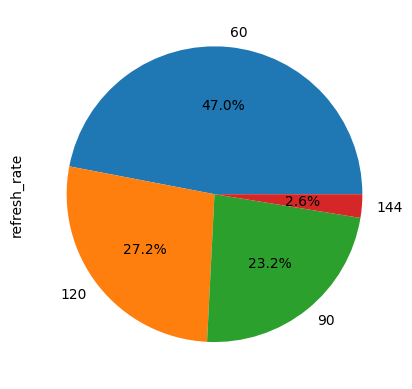

In [37]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [38]:
df['refresh_rate'].value_counts()

60     366
120    212
90     181
144     20
Name: refresh_rate, dtype: int64

## num_front_cameras, num_rear_cameras

<Axes: ylabel='num_rear_cameras'>

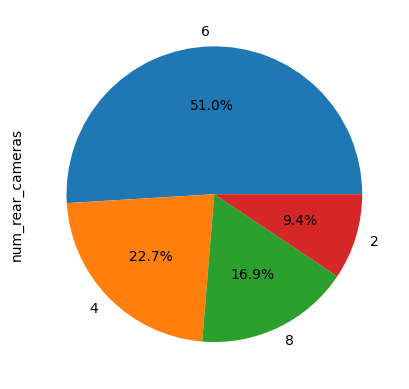

In [39]:
(df['num_rear_cameras']+df['num_rear_cameras']).value_counts().plot(kind='pie',autopct='%0.1f%%')

In [40]:
(df['num_rear_cameras']+df['num_rear_cameras']).value_counts()

6    397
4    177
8    132
2     73
Name: num_rear_cameras, dtype: int64

## os_type

<Axes: ylabel='os_type'>

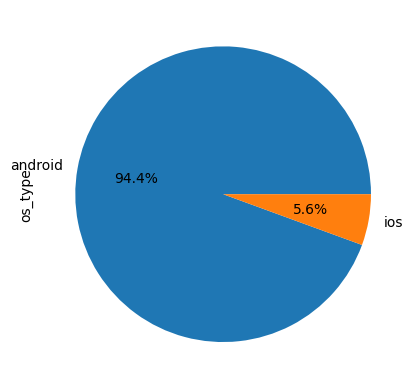

In [41]:
df['os_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [42]:
df['os_type'].value_counts()

android    728
ios         43
Name: os_type, dtype: int64

## extended_memory_available

<Axes: ylabel='extended_memory_available'>

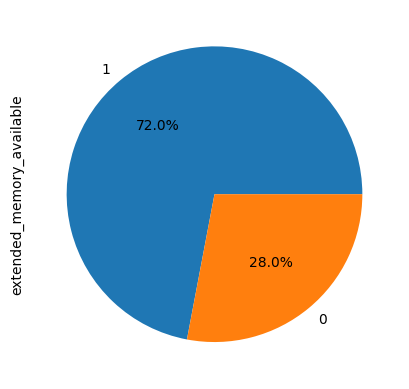

In [43]:
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## extended_upto

<Axes: ylabel='extended_upto'>

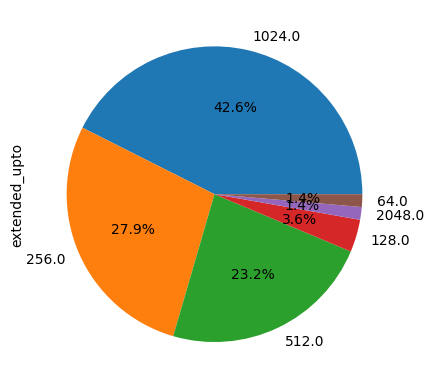

In [44]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [45]:
df['extended_upto'].value_counts() 

1024.0    215
256.0     141
512.0     117
128.0      18
2048.0      7
64.0        7
Name: extended_upto, dtype: int64

# Univariate analysis on numerical columns

## price

In [46]:
df['price'].describe()

count       779.000000
mean      25726.952503
std       27246.274244
min        4040.000000
25%       10945.000000
50%       15990.000000
75%       28996.500000
max      174990.000000
Name: price, dtype: float64

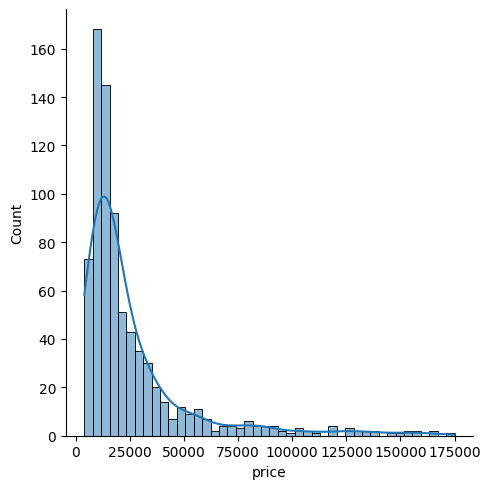

In [47]:
#understand distruibution

#hist
#kde
sns.displot(kind='hist',data=df, x='price', kde=True)

#highly skewed

#many phones come under lower price
#very few phones have higher price

#most phones are between 0-20k

In [48]:
df['price'].skew()
# -3 to +3 skewness is acceptable

2.7883871359955594

<Axes: >

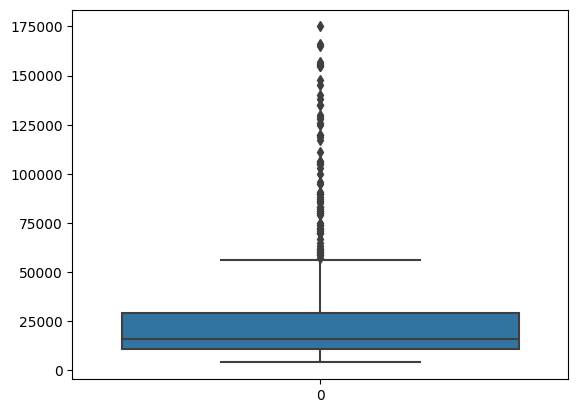

In [49]:
#outliers
#box plot
sns.boxplot(df['price'])

#does outliers exist?: yes
#are they really outliers: does the other cols specified justifies it's high price

In [50]:
#go to different price and check if those outliers are justified
df[df['price']>100000]

#all phones are either samsung or apple and 

,brand_name,model,price,ratings,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_capacity,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cameras,primary_rear_camera,num_front_cameras,primary_front_camera,extended_memory_available,extended_upto,os_type
11,samsung,Samsung Galaxy S23 Ultra 5G,124999,94,True,True,False,Snapdragon 8 Gen 2,snapdragon,8.0,3.36,12.0,256.0,5000.0,45.0,1,6.8,1440 x 3088,120,4,200.0,1,12.0,0,NaN,android
28,apple,Apple iPhone 14 Pro Max,127999,85,True,True,False,Bionic A16,bionic,6.0,3.46,6.0,128.0,4323.0,NaN,1,6.7,1290 x 2796,120,3,48.0,1,12.0,0,NaN,ios
79,apple,Apple iPhone 14 Pro,119990,84,True,True,False,Bionic A16,bionic,6.0,3.46,6.0,128.0,3200.0,NaN,1,6.1,1179 x 2556,120,3,48.0,1,12.0,0,NaN,ios
96,apple,Apple iPhone 13 Pro,119900,83,True,True,False,Bionic A15,bionic,6.0,3.22,6.0,128.0,3095.0,NaN,1,6.1,1170 x 2532,120,3,12.0,1,12.0,0,NaN,ios
140,apple,Apple iPhone 13 Pro Max,116990,84,True,True,False,Bionic A15,bionic,6.0,3.22,6.0,128.0,4352.0,NaN,1,6.7,1284 x 2778,120,3,12.0,1,12.0,0,NaN,ios
141,apple,Apple iPhone 14 Pro Max (256GB),137990,86,True,True,False,Bionic A16,bionic,6.0,3.46,6.0,256.0,4323.0,NaN,1,6.7,1290 x 2796,120,3,48.0,1,12.0,0,NaN,ios
157,samsung,Samsung Galaxy S23 Ultra (12GB RAM + 1TB),154999,95,True,True,False,Snapdragon 8 Gen 2,snapdragon,8.0,3.36,12.0,1024.0,5000.0,45.0,1,6.8,1440 x 3088,120,4,200.0,1,12.0,0,NaN,android
192,apple,Apple iPhone 14 Pro Max (1TB),174990,87,True,True,False,Bionic A16,bionic,6.0,3.46,6.0,1024.0,4323.0,NaN,1,6.7,1290 x 2796,120,3,48.0,1,12.0,0,NaN,ios
208,samsung,Samsung Galaxy S21 Ultra,105999,93,True,True,False,Exynos 2100,exynos,8.0,2.90,12.0,256.0,5000.0,25.0,1,6.8,1440 x 3200,120,4,108.0,1,40.0,0,NaN,android
209,samsung,Samsung Galaxy S23 Ultra (12GB RAM + 512GB),134999,94,True,True,False,Snapdragon 8 Gen 2,snapdragon,8.0,3.36,12.0,512.0,5000.0,45.0,1,6.8,1440 x 3088,120,4,200.0,1,12.0,0,NaN,android


In [51]:
 #missing values
#how to fill them
df['price'].isnull().sum()

0

## ratings

- numeric

**conclusions**



In [52]:
#descriptive stats
df['ratings'].describe()

count    779.000000
mean      75.774069
std        9.837905
min       38.000000
25%       69.500000
50%       78.000000
75%       83.000000
max       95.000000
Name: ratings, dtype: float64

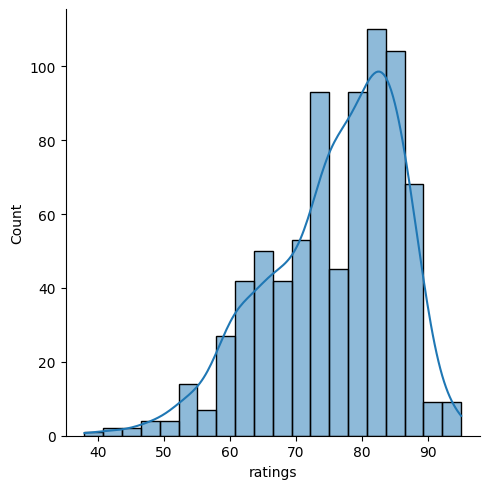

In [53]:
#distribution
sns.displot(kind='hist',data=df,x='ratings',kde=True)

In [54]:
 #skew
df['ratings'].skew()
#closer to 0 good sign

-0.7381309110193988

<Axes: >

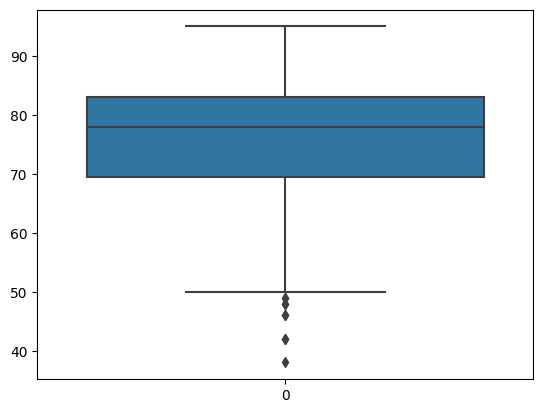

In [55]:
#outliers
sns.boxplot(df['ratings'])

In [56]:
df[df['ratings']<50]

,brand_name,model,price,ratings,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_capacity,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cameras,primary_rear_camera,num_front_cameras,primary_front_camera,extended_memory_available,extended_upto,os_type
284,itel,itel A60,5999,49,False,False,False,Unisoc SC9832E,unisoc,NaN,NaN,2.0,32.0,5000.0,NaN,0,6.60,720 x 1612,60,2,8.0,1,5.0,1,128.0,android
493,itel,itel A23s,4649,42,False,False,False,Spreadtrum SC9832E,spreadtrum,4.0,1.4,2.0,32.0,3020.0,NaN,0,5.00,854 x 480,60,1,2.0,0,NaN,0,NaN,android
578,lava,Lava Z21,5149,46,False,False,False,NaN,NaN,NaN,NaN,2.0,32.0,3100.0,NaN,0,5.00,480 x 854,60,1,5.0,1,2.0,1,256.0,android
627,itel,Itel A23 Pro,4040,38,False,False,False,Spreadtrum SC9832E,spreadtrum,4.0,1.4,1.0,8.0,2400.0,NaN,0,5.00,854 x 480,60,1,5.0,1,2.0,0,NaN,android
691,lava,Lava Z21,5299,46,False,False,False,NaN,NaN,NaN,NaN,2.0,32.0,3100.0,NaN,0,5.00,480 x 854,60,1,5.0,1,2.0,1,256.0,android
693,itel,itel A27,4999,42,False,False,False,NaN,NaN,NaN,NaN,2.0,32.0,4000.0,NaN,0,5.45,480 x 960,60,1,5.0,1,2.0,0,NaN,android
699,ikall,iKall Z8,4499,49,False,False,False,NaN,NaN,4.0,1.3,3.0,16.0,3000.0,NaN,0,5.45,480 x 960,60,1,8.0,1,5.0,1,64.0,android
706,ikall,iKall Z5,4499,48,False,False,False,NaN,NaN,4.0,1.3,3.0,16.0,3000.0,NaN,0,5.45,480 x 960,60,1,8.0,1,5.0,1,NaN,android
716,ikall,iKall Z1,4799,48,False,False,False,NaN,NaN,4.0,1.3,4.0,32.0,3000.0,NaN,0,5.45,480 x 960,60,1,8.0,1,5.0,0,NaN,android


In [70]:
def plot_graphs(column_name):
  sns.displot(kind='hist',kde=True, data=df, x=column_name,)
  sns.catplot(kind='box', data=df, x=column_name,)

In [63]:
num_columns=df.select_dtypes(include=['float64','int64']).iloc[:,[3,5,6,7,9,12,14]].columns

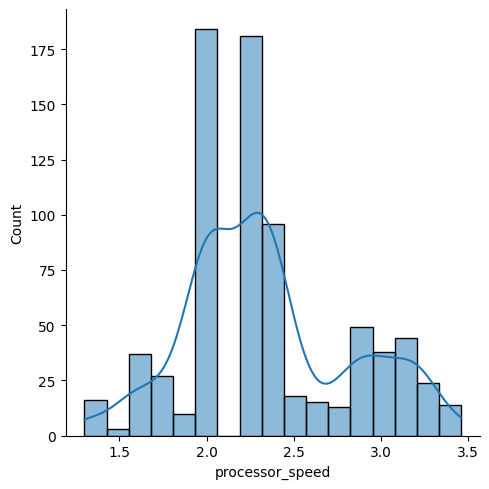

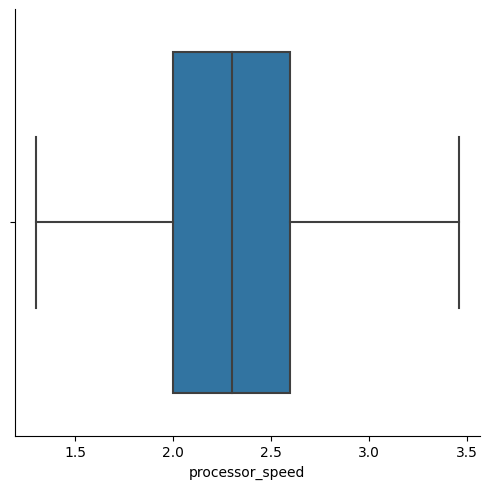

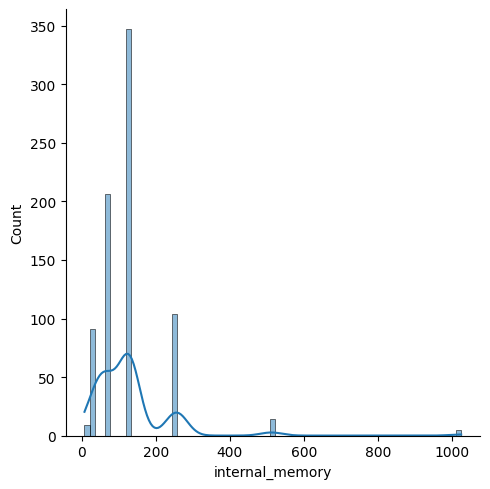

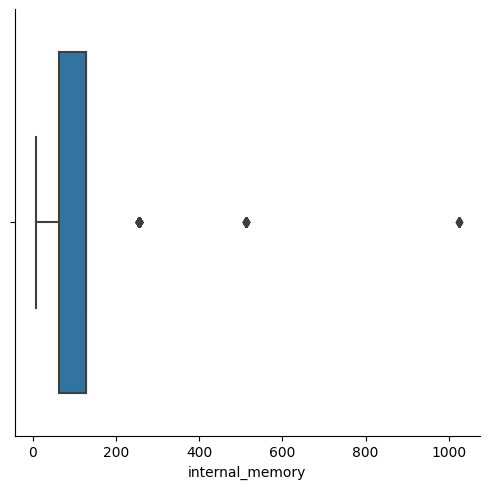

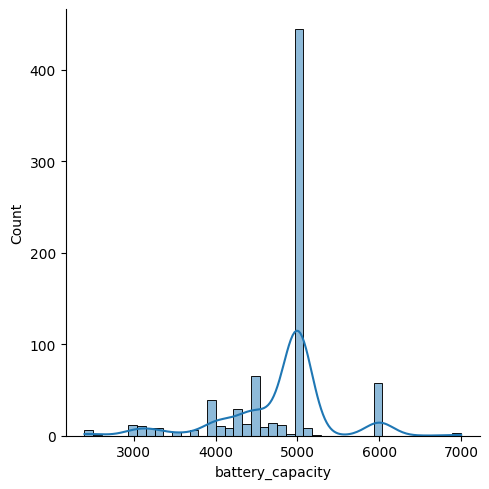

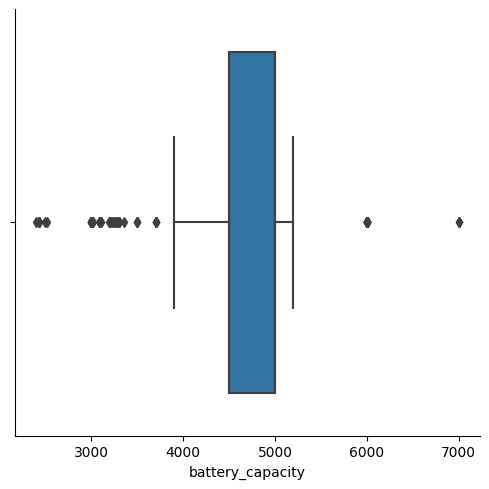

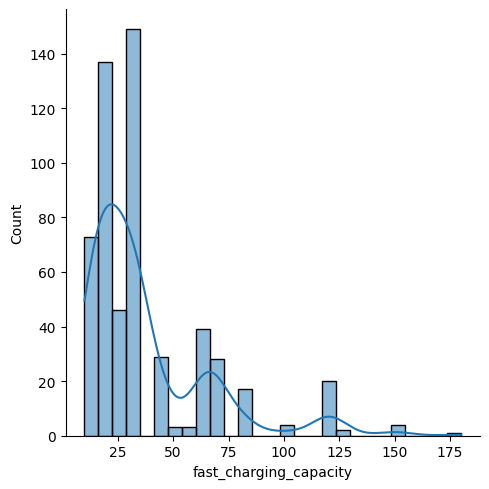

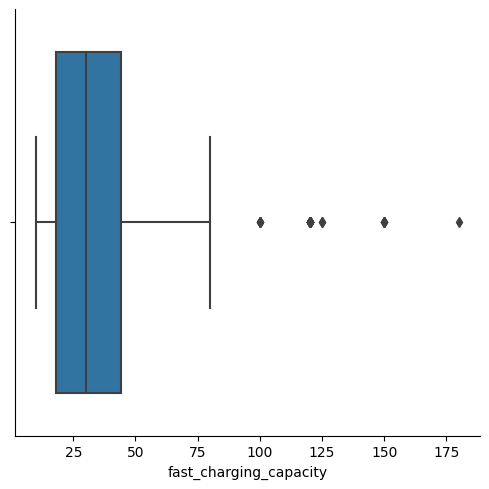

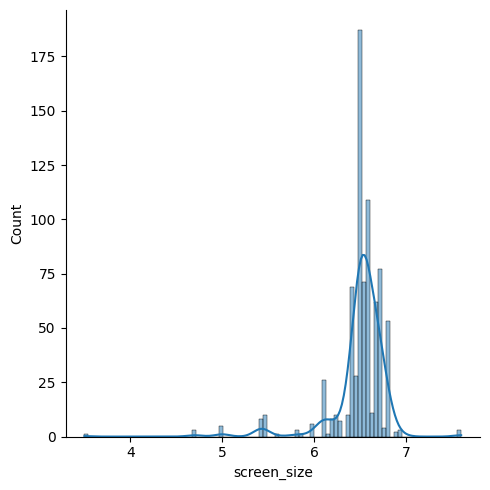

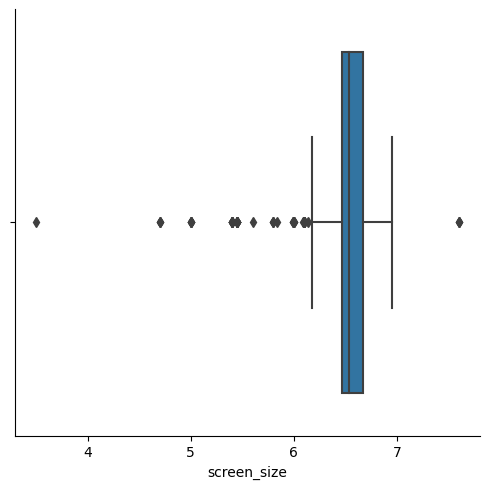

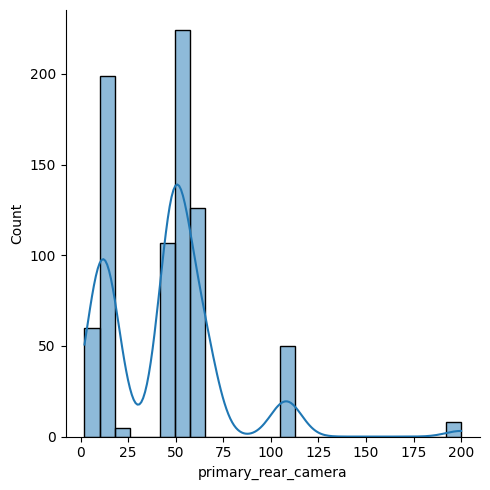

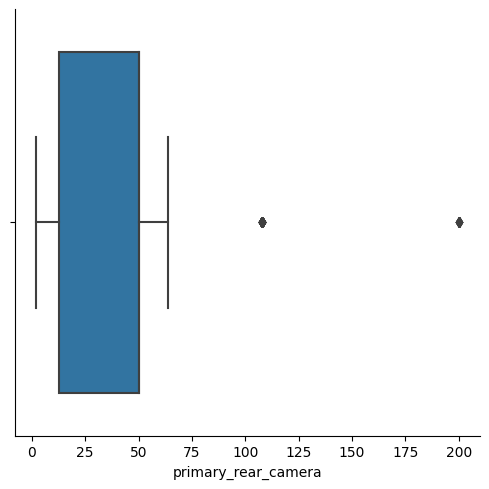

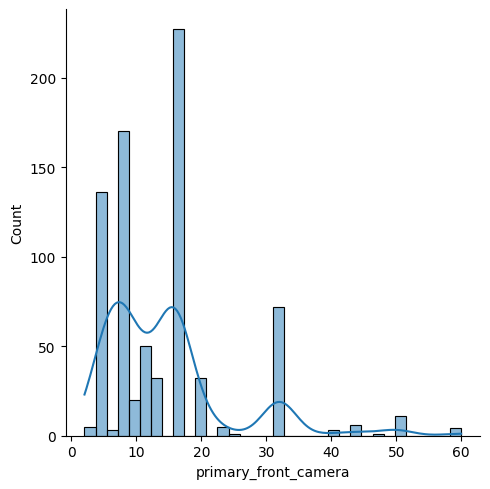

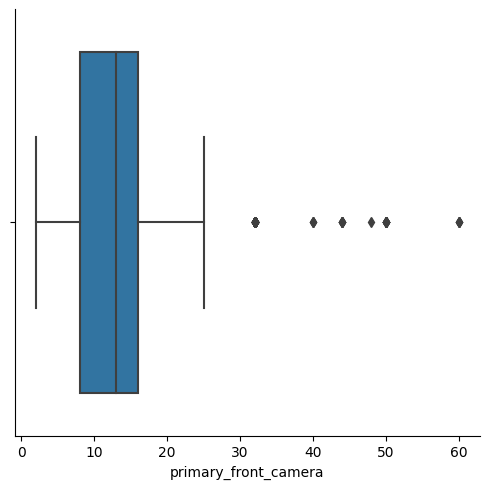

In [71]:
for i in num_columns:
  plot_graphs(i)

# Bivariate analysis

## price, brand_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'oppo'),
  Text(1, 0, 'vivo'),
  Text(2, 0, 'oneplus'),
  Text(3, 0, 'motorola'),
  Text(4, 0, 'samsung'),
  Text(5, 0, 'realme'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'apple'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'xiaomi'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'lava'),
  Text(12, 0, 'google'),
  Text(13, 0, 'infinix'),
  Text(14, 0, 'ikall'),
  Text(15, 0, 'nokia'),
  Text(16, 0, 'tecno'),
  Text(17, 0, 'jio'),
  Text(18, 0, 'itel'),
  Text(19, 0, 'asus'),
  Text(20, 0, 'micromax'),
  Text(21, 0, 'benco'),
  Text(22, 0, 'sony'),
  Text(23, 0, 'elephone'),
  Text(24, 0, 'lyf'),
  Text(25, 0, 'blackberry'),
  Text(26, 0, 'telefono'),
  Text(27, 0, 'gionee')])

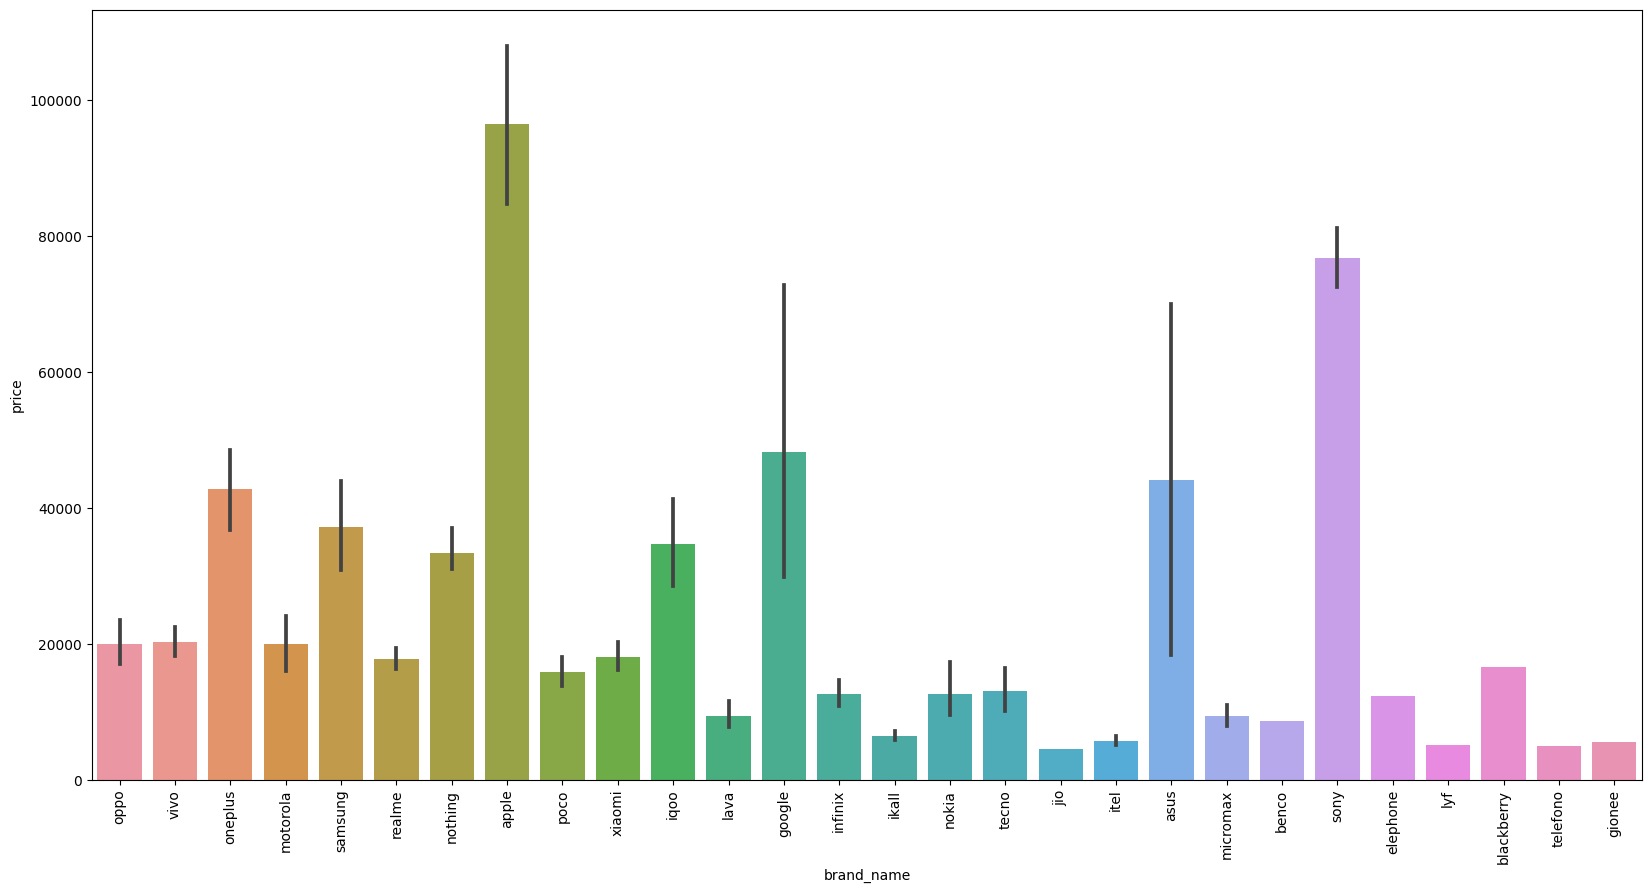

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='brand_name', y='price')
plt.xticks(rotation='vertical')

In [87]:
x=df.groupby('brand_name').count()['model']  

In [88]:
temp_df=df[df['brand_name'].isin(x[x>10].index)]

[]

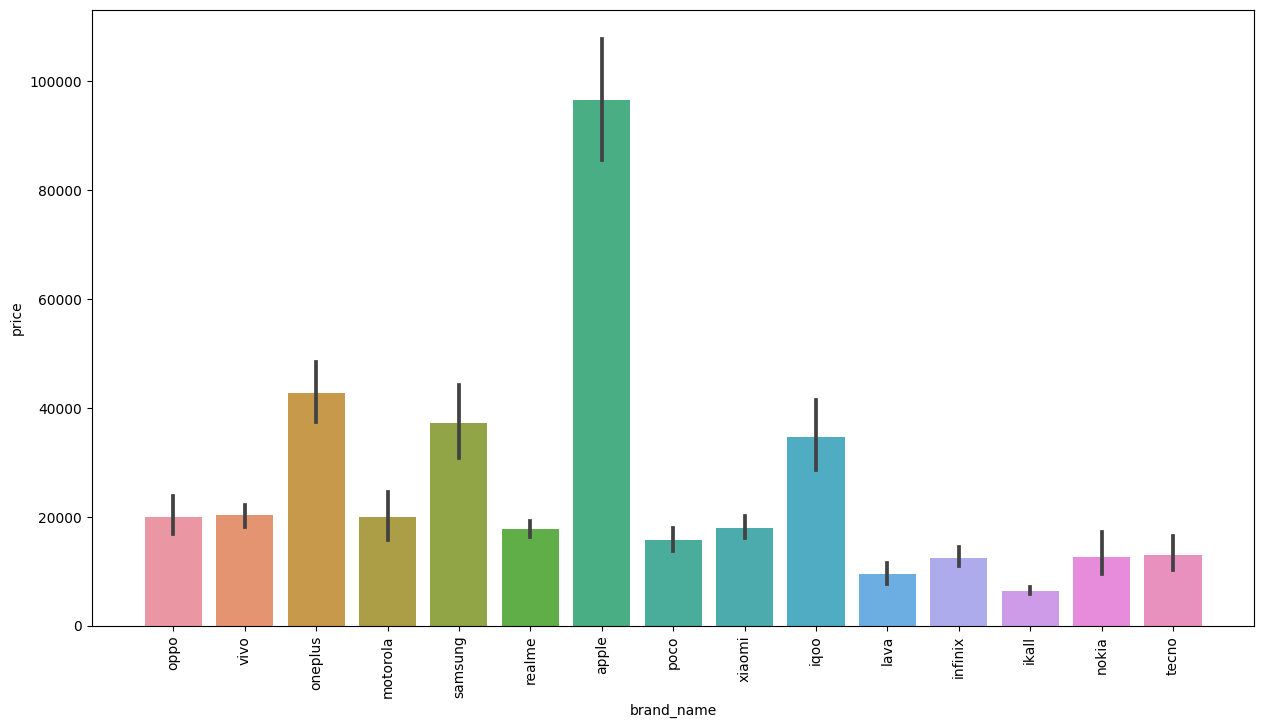

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df, x='brand_name', y='price')
plt.xticks(rotation='vertical')
plt.plot()

## price, rating

<Axes: xlabel='ratings', ylabel='price'>

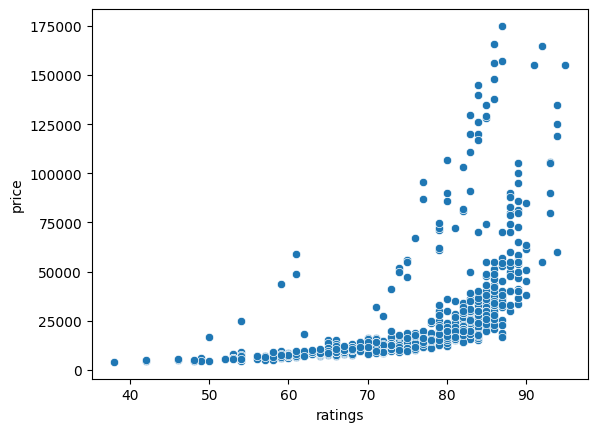

In [91]:
sns.scatterplot(data=df, x='ratings', y='price')

## price, has_5g

<Axes: xlabel='has_5g', ylabel='price'>

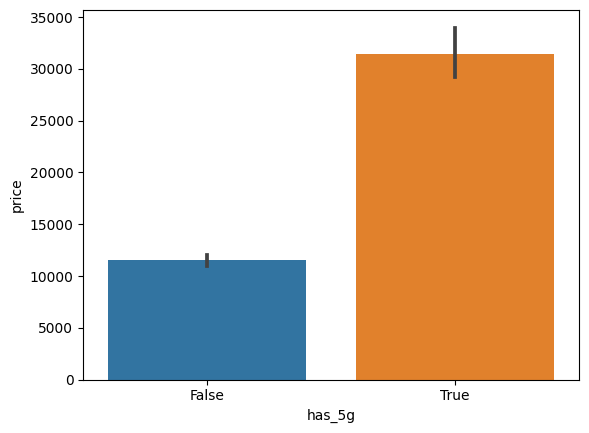

In [95]:
sns.barplot(data=df, x='has_5g', y='price', estimator=np.median)

## price, has_nfc

<Axes: xlabel='has_nfc', ylabel='price'>

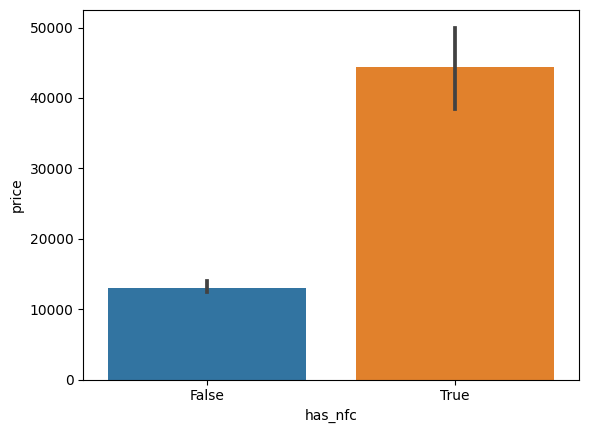

In [96]:
sns.barplot(data=df, x='has_nfc', y='price', estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

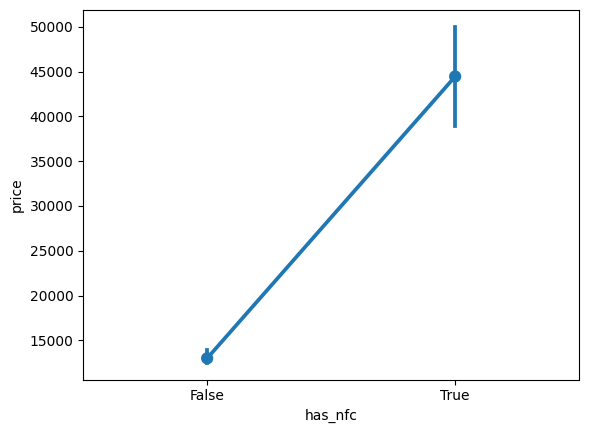

In [97]:
sns.pointplot(data=df, x='has_nfc', y='price', estimator=np.median)

## price, has_ir_blaster

<Axes: xlabel='has_ir_blaster', ylabel='price'>

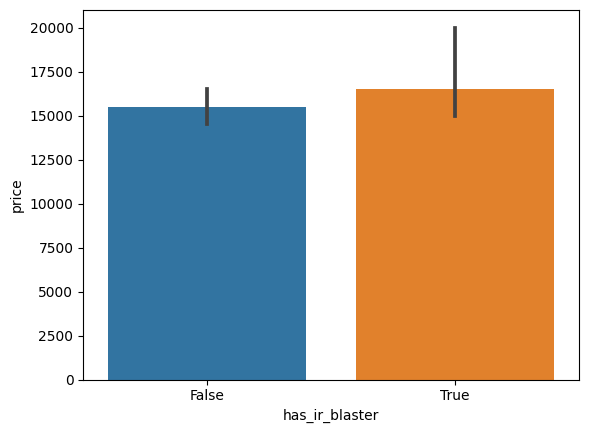

In [98]:
sns.barplot(data=df, x='has_ir_blaster', y='price', estimator=np.median)

## price, processor_brand

[]

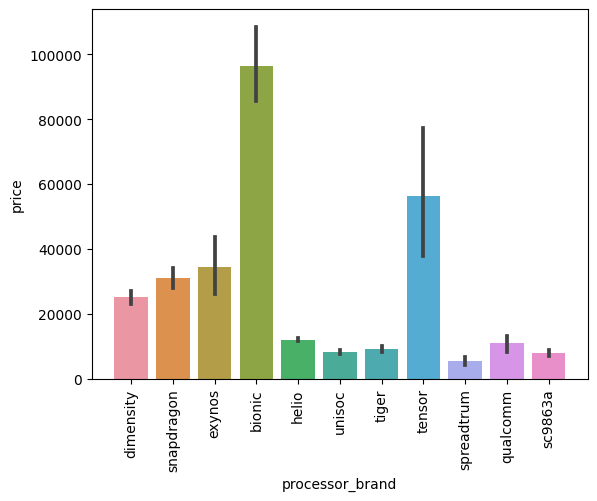

In [101]:
sns.barplot(data=df, x='processor_brand', y='price')
plt.xticks(rotation='vertical')
plt.plot()

## price, num_cores

- hexa core more costly than octa cores
  - assumption - apple phones mostly are hexa cores: **true**

<Axes: xlabel='num_cores', ylabel='price'>

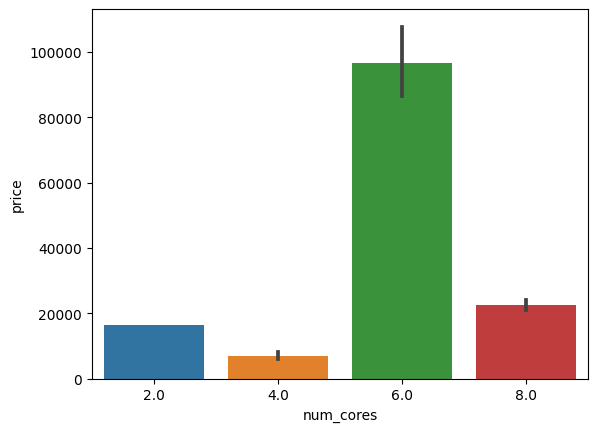

In [102]:
sns.barplot(data=df, x='num_cores', y='price')


## num_cores, os

In [104]:
pd.crosstab(df['num_cores'],df['os_type'])
#all ios phones are hexa cores

os_type,android,ios
num_cores,,
4.0,36,0
6.0,0,43
8.0,682,0


## price, processor_speed

<Axes: xlabel='processor_speed', ylabel='price'>

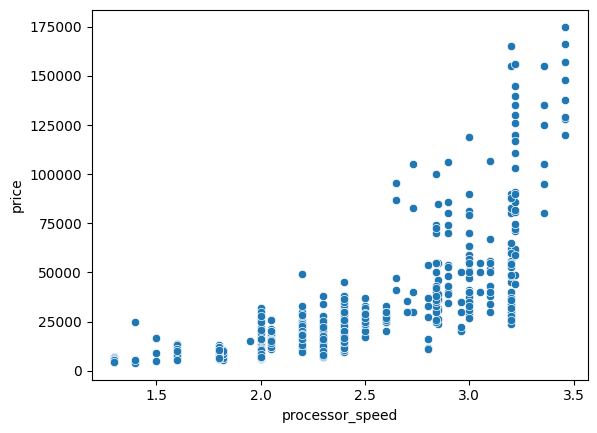

In [105]:
sns.scatterplot(data=df, x='processor_speed', y='price')

## price, screen_size

<Axes: xlabel='screen_size', ylabel='price'>

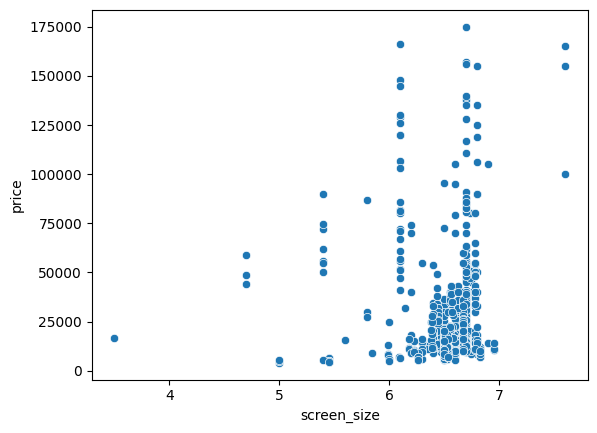

In [106]:
sns.scatterplot(data=df, x='screen_size', y='price')

# multivariate

<Axes: >

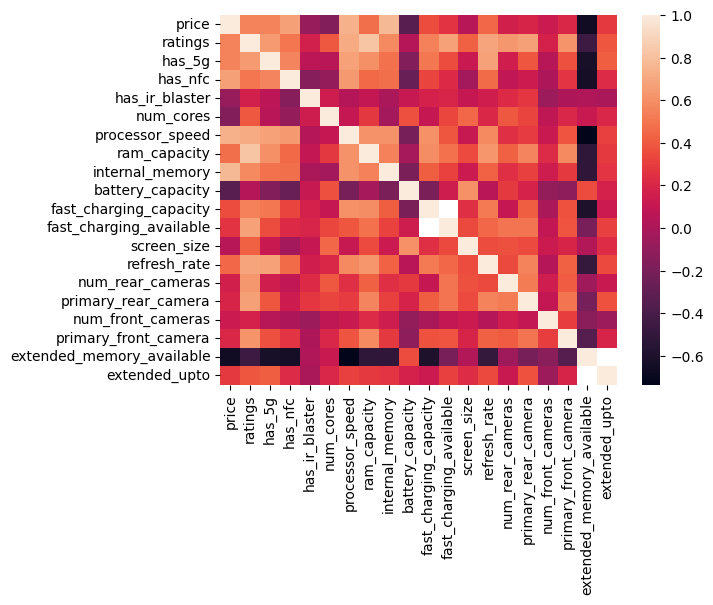

In [109]:
sns.heatmap(df.corr())

In [112]:
df.corr()['price']

price                        1.000000
ratings                      0.552161
has_5g                       0.551022
has_nfc                      0.665695
has_ir_blaster              -0.080558
num_cores                   -0.162300
processor_speed              0.742145
ram_capacity                 0.473182
internal_memory              0.774313
battery_capacity            -0.339224
fast_charging_capacity       0.351761
fast_charging_available      0.258451
screen_size                  0.049328
refresh_rate                 0.448239
num_rear_cameras             0.165653
primary_rear_camera          0.188241
num_front_cameras            0.126290
primary_front_camera         0.212740
extended_memory_available   -0.655159
extended_upto                0.285973
Name: price, dtype: float64

# Feature Engeenring



## resolution

- convert to - hd, ultra hd... based on resolution